In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=24)

client = Client(cluster)
client


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/bokeh/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


Client Scheduler: tcp://127.0.0.1:46128 Dashboard: http://127.0.0.1:40754/status,Cluster Workers: 24 Cores: 48 Memory: 134.91 GB


In [2]:
import sys, glob
import numpy as np
import xarray as xr
import time
import zarr
import matplotlib.pyplot as plt


In [3]:
def check_zarr(zarrdir,var,sort):
    print(zarrdir)
    ds=xr.open_zarr(zarrdir)
    print(str(np.around(ds[var].nbytes/1e9))+ ' GB of data')
    if sort == 'True':
        ds_sorted=ds.sortby('time_counter')
        fig=plt.figure(figsize=(15,12))
        ds_sorted[var][0].plot()
        fig=plt.figure(figsize=(15,5))
        ds_sorted[var][:,3000,4000].plot()
    else:
        fig=plt.figure(figsize=(15,12))
        ds[var][0].plot()
        fig=plt.figure(figsize=(15,5))
        ds[var][:,3000,4000].plot()
            

In [8]:
!ls /store/albert7a/eNATL60/zarr/eNATL60-BLB002-SSH-1h/eNATL60-BLB002-SSH-1h-y2009m07

nav_lon  sossheig  time_centered


In [9]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLB002-SSH-1h/eNATL60-BLB002-SSH-1h-y2009m07','sossheig','True')

/store/albert7a/eNATL60/zarr/eNATL60-BLB002-SSH-1h/eNATL60-BLB002-SSH-1h-y2009m07


ValueError: group not found at path ''

In [10]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLB002X-SSH-1h','sossheig','True')

/store/albert7a/eNATL60/zarr/eNATL60-BLB002X-SSH-1h


ValueError: conflicting sizes for dimension 'time_counter': length 1488 on 'time_centered' and length 2952 on 'sossheig'

/store/albert7a/eNATL60/zarr/eNATL60-BLB002X-SSH-1h-bis
1506.0 GB of data


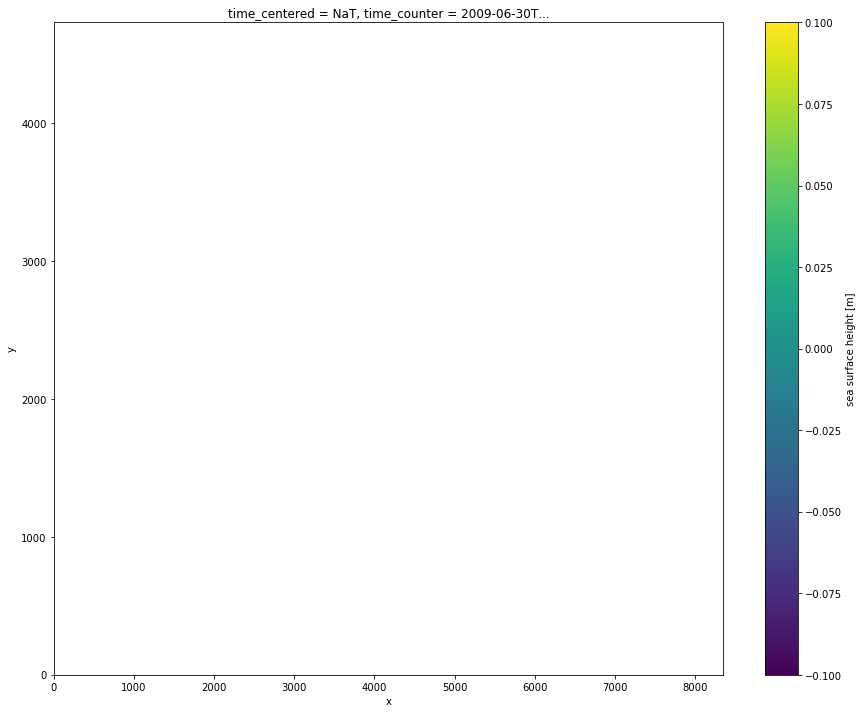

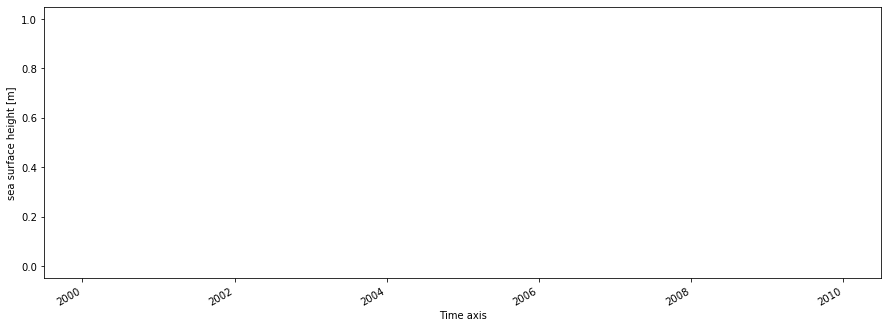

In [12]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLB002X-SSH-1h-bis','sossheig','True')

/store/albert7a/eNATL60/zarr/eNATL60-BLBT02-SSH-1h
1847.0 GB of data


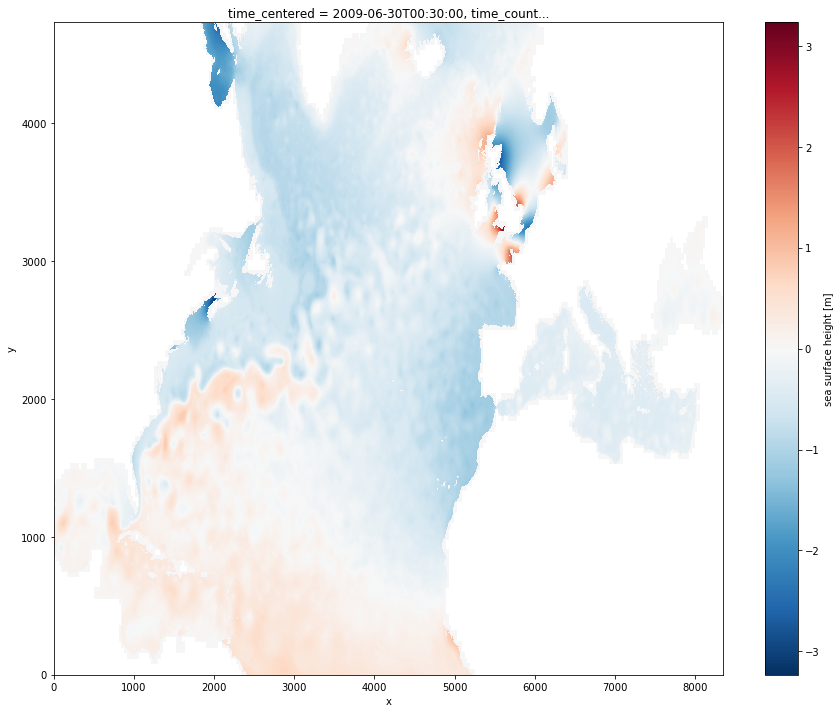

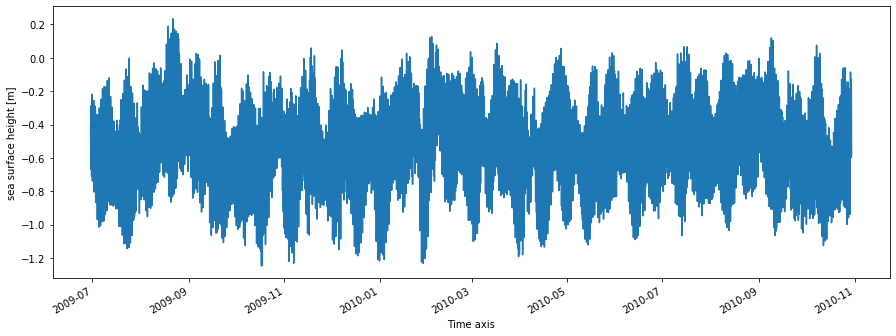

In [11]:
check_zarr('/store/albert7a/eNATL60/zarr/eNATL60-BLBT02-SSH-1h','sossheig','True')